# Initial EDA
Quick comparison of the DEM grids stored under `data/` using the same helpers our dataset tooling relies on.


In [ ]:
import sys, pathlib
sys.path.append(str(pathlib.Path.cwd() / "dataset"))


In [ ]:
from pathlib import Path
import math

import numpy as np
import matplotlib.pyplot as plt

from dataset.dataset import load_dem_data_, get_dem_xv_yv_, DATASET_INFO

DATA_DIR = Path("data")
DATASET_KEYS = ["norway", "phil", "holland", "la"]
DATASET_FILES = {
    "norway": DATA_DIR / "norway-smallest.txt",
    "phil": DATA_DIR / "flat-phil-data-1.txt",
    "holland": DATA_DIR / "holland-new.txt",
    "la": DATA_DIR / "la-4kx4k.npy",
}
MAX_DIM = 1100

# For referennce, this s dataset_info:
# DATASET_INFO = {'norway': [10, False], 
# 'phil': [3, True], 
# 'holland': [1.524, True], 
# 'la': [28.34, False], 
# 'artificial': [10/50, False]}

def load_dem_grid(dataset_key: str, max_dim: int = MAX_DIM):
    path = DATASET_FILES[dataset_key]
    resolution_m, imperial = DATASET_INFO[dataset_key]
    if path.suffix == ".npy":
        dem = np.load(path)
    else:
        dem = load_dem_data_(str(path), imperial=imperial)
    step = max(1, math.ceil(max(dem.shape) / max_dim))
    if step > 1:
        dem = dem[::step, ::step]
        effective_resolution_m = resolution_m * step
    else:
        effective_resolution_m = resolution_m
    xv, yv, elev_km = get_dem_xv_yv_(dem, effective_resolution_m, visualize=False)
    extent = [float(xv.min()), float(xv.max()), float(yv.min()), float(yv.max())]
    return {
        "path": path,
        "elevation_km": elev_km, # elevation at each grid point
        "extent": extent, # the min and max of x y
        "step": int(step), # downsample factor
        "resolution_m": float(effective_resolution_m), # resolution of the grid
    }



/Users/jporras/miniconda3/envs/shortest-paths-nn/lib/python3.10/site-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: dlopen(/Users/jporras/miniconda3/envs/shortest-paths-nn/lib/python3.10/site-packages/libpyg.so, 0x0006): Library not loaded: /Library/Frameworks/Python.framework/Versions/3.10/Python
  Referenced from: <0F9D4B2E-DD75-3BAC-BD55-6FA98E65FDBD> /Users/jporras/miniconda3/envs/shortest-paths-nn/lib/python3.10/site-packages/libpyg.so
  Reason: tried: '/Library/Frameworks/Python.framework/Versions/3.10/Python' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/Python.framework/Versions/3.10/Python' (no such file), '/Library/Frameworks/Python.framework/Versions/3.10/Python' (no such file)
  import torch_geometric.typing
/Users/jporras/miniconda3/envs/shortest-paths-nn/lib/python3.10/site-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'to

In [ ]:
dataset_grids = {key: load_dem_grid(key) for key in DATASET_KEYS}

for key, meta in dataset_grids.items():
    elev = meta["elevation_km"]
    print(f"{key:<8} | {meta['path'].name:<20} | grid {elev.shape[0]}x{elev.shape[1]} | resolution {meta['resolution_m']:.1f} m | downsample x{meta['step']}")

Elevation given in imperial units: False
loaded DEM array with shape: (2000, 2000)
Elevation given in imperial units: True
loaded DEM array with shape: (1000, 1000)
Elevation given in imperial units: True
loaded DEM array with shape: (1000, 1000)
norway   | norway-smallest.txt  | grid 1000x1000 | resolution 20.0 m | downsample x2
phil     | flat-phil-data-1.txt | grid 1000x1000 | resolution 3.0 m | downsample x1
holland  | holland-new.txt      | grid 1000x1000 | resolution 1.5 m | downsample x1
la       | la-4kx4k.npy         | grid 1000x1000 | resolution 113.4 m | downsample x4


## Dataset exploration

In [ ]:
dataset_grids['norway']

{'path': PosixPath('data/norway-smallest.txt'),
 'elevation_km': array([[1.552 , 1.5542, 1.5561, ..., 1.3962, 1.3917, 1.3866],
        [1.5511, 1.5538, 1.5561, ..., 1.3946, 1.3909, 1.3861],
        [1.5505, 1.5538, 1.5565, ..., 1.3924, 1.388 , 1.3836],
        ...,
        [1.4214, 1.4166, 1.4108, ..., 1.355 , 1.355 , 1.355 ],
        [1.4203, 1.4163, 1.4123, ..., 1.355 , 1.355 , 1.355 ],
        [1.42  , 1.4165, 1.4138, ..., 1.355 , 1.355 , 1.355 ]],
       shape=(1000, 1000)),
 'extent': [0.0, 20.0, 0.0, 20.0],
 'step': 2,
 'resolution_m': 20.0}

In [ ]:
# elevation grids
dataset_grids['norway']['elevation_km']

array([[1.552 , 1.5542, 1.5561, ..., 1.3962, 1.3917, 1.3866],
       [1.5511, 1.5538, 1.5561, ..., 1.3946, 1.3909, 1.3861],
       [1.5505, 1.5538, 1.5565, ..., 1.3924, 1.388 , 1.3836],
       ...,
       [1.4214, 1.4166, 1.4108, ..., 1.355 , 1.355 , 1.355 ],
       [1.4203, 1.4163, 1.4123, ..., 1.355 , 1.355 , 1.355 ],
       [1.42  , 1.4165, 1.4138, ..., 1.355 , 1.355 , 1.355 ]],
      shape=(1000, 1000))

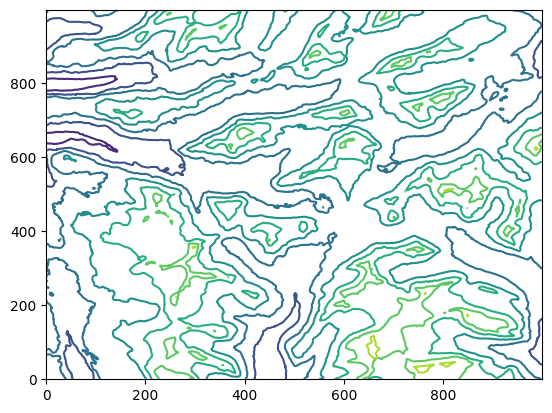

In [ ]:
dataset_grids['norway']['extent'] # the min and max of x y

[0.0, 20.0, 0.0, 20.0]

In [ ]:
arr = meta['elevation_km']
ny, nx = arr.shape
xmin, xmax, ymin, ymax = meta['extent']

dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)

print(dx, dy)

0.11347347347347347 0.11347347347347347


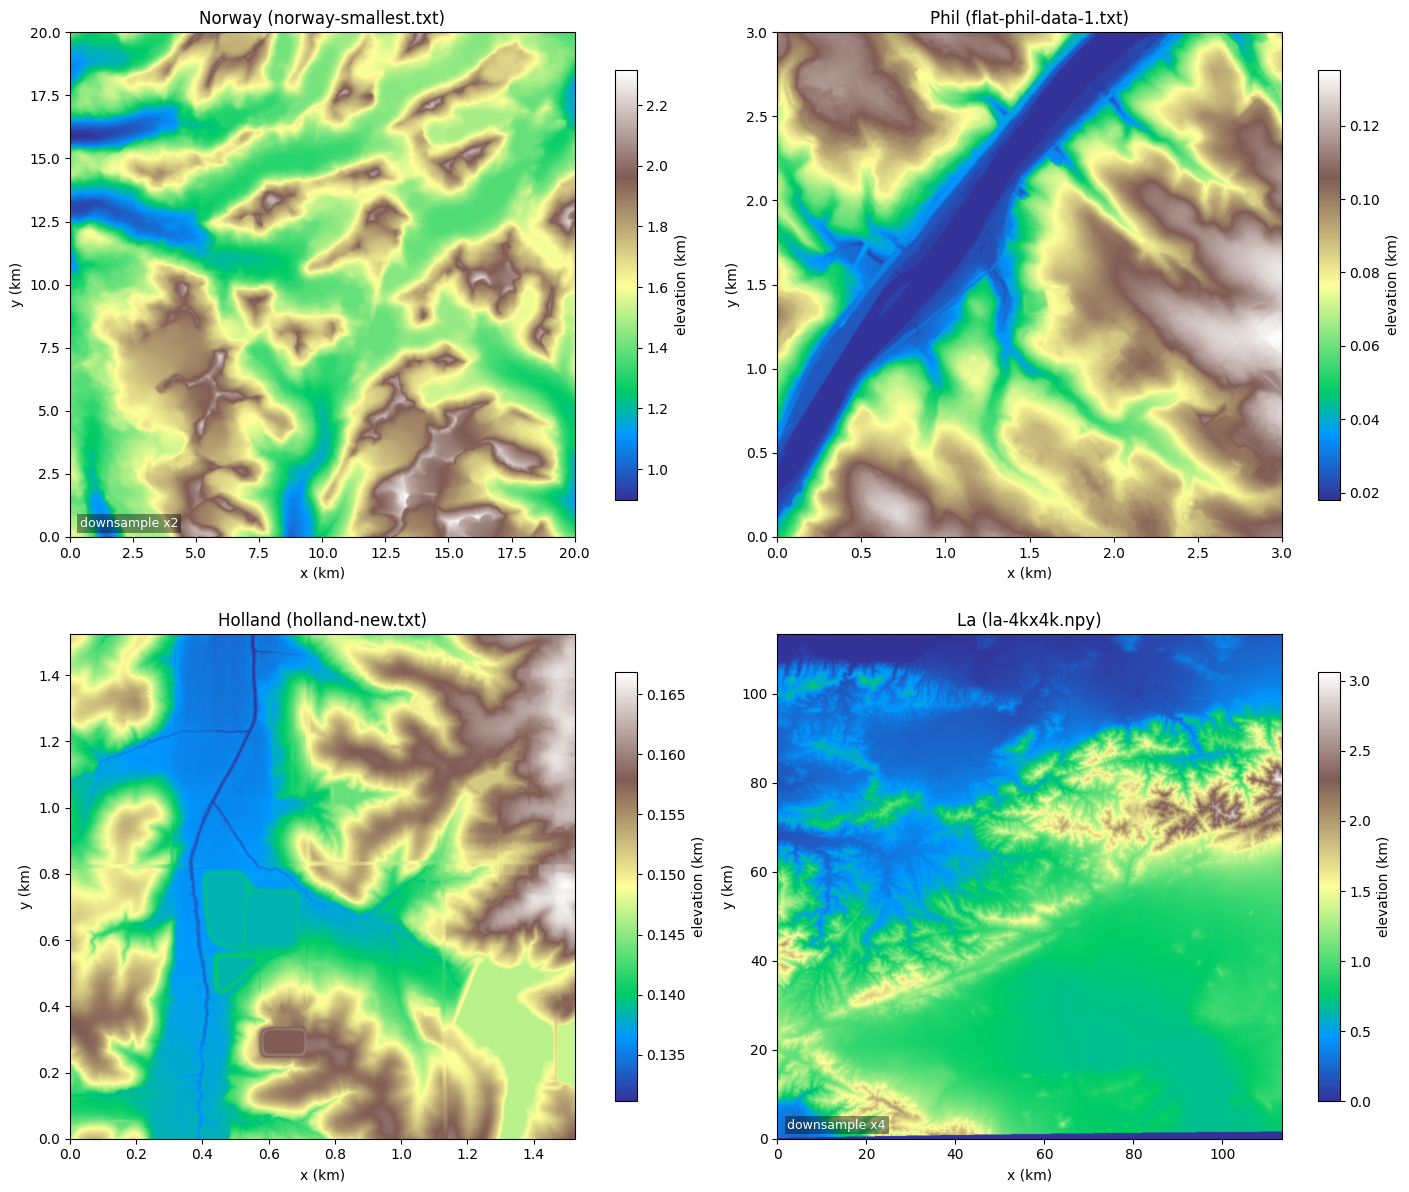

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12), constrained_layout=True)
axes = axes.flatten()

for ax, key in zip(axes, DATASET_KEYS):
    meta = dataset_grids[key]
    im = ax.imshow(meta['elevation_km'], extent=meta['extent'], origin='lower', cmap='terrain', aspect='equal')
    ax.set_title(f"{key.title()} ({meta['path'].name})")
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')
    cbar = plt.colorbar(im, ax=ax, shrink=0.8)
    cbar.set_label('elevation (km)')
    if meta['step'] > 1:
        ax.text(0.02, 0.02, f"downsample x{meta['step']}", transform=ax.transAxes,
                color='white', fontsize=9,
                bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', pad=2.0))
    
plt.show()

## 

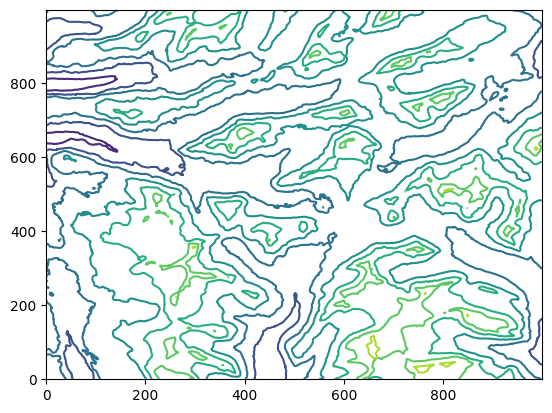

In [ ]:
# another view
plt.contour(dataset_grids['norway']['elevation_km'])


## What do the shortes path datasets contain? `res01_phase1.npz`

In [ ]:
import numpy as np
res01=np.load("generated/res01_phase1.npz")

In [ ]:
res01

NpzFile 'generated/res01_phase1.npz' with keys: edge_index, distances, srcs, tars, lengths...

In [ ]:
res01['edge_index']

array([[      0,    2000,       0, ..., 3999998, 3999998, 3999999],
       [   2000,       0,       1, ..., 3999997, 3999999, 3999998]],
      shape=(2, 31976004))

In [ ]:
res01['distances']

array([0.010013  , 0.010013  , 0.01007671, ..., 0.010005  , 0.010005  ,
       0.010005  ], shape=(31976004,))

In [ ]:
res01['srcs'], res01['tars'],res01['lengths']

(array([3582752, 3582752, 3582752, ...,  683973,  683973,  683973],
       shape=(50000,)),
 array([1573178, 1578349, 3150035, ..., 1844135, 1605712, 3396058],
       shape=(50000,)),
 array([12.15293598, 12.05540243,  8.12637784, ..., 21.17631575,
         5.70769356, 25.43081317], shape=(50000,)))

In [ ]:
res01['node_features']

array([[0.00000000e+00, 0.00000000e+00, 1.55200000e+00],
       [1.00050025e-02, 0.00000000e+00, 1.55320000e+00],
       [2.00100050e-02, 0.00000000e+00, 1.55420000e+00],
       ...,
       [1.99799900e+01, 2.00000000e+01, 1.35500000e+00],
       [1.99899950e+01, 2.00000000e+01, 1.35500000e+00],
       [2.00000000e+01, 2.00000000e+01, 1.35500000e+00]],
      shape=(4000000, 3))

## Network Analysis of res01
Graph statistics: average degree, variance, connected components, and diameter.

In [ ]:
import networkx as nx
from collections import Counter

# Build undirected graph from edge_index
edge_index = res01['edge_index']
node_features = res01['node_features']

print(f"Building graph from {node_features.shape[0]:,} nodes and {edge_index.shape[1]:,} directed edges...")
G = nx.Graph()
G.add_nodes_from(range(node_features.shape[0]))
edges = list(zip(edge_index[0], edge_index[1]))
G.add_edges_from(edges)
print(f"Graph built: {G.number_of_nodes():,} nodes, {G.number_of_edges():,} undirected edges")

# Degree analysis
degrees = [d for n, d in G.degree()]
avg_degree = np.mean(degrees)
var_degree = np.var(degrees)
std_degree = np.std(degrees)

print(f"\n--- Degree Analysis ---")
print(f"Average degree: {avg_degree:.4f}")
print(f"Variance of degree: {var_degree:.4f}")
print(f"Std deviation of degree: {std_degree:.4f}")
print(f"Min degree: {min(degrees)}, Max degree: {max(degrees)}")

# Degree distribution
degree_counts = Counter(degrees)
print(f"\nDegree distribution:")
for deg, count in sorted(degree_counts.items()):
    print(f"  Degree {deg}: {count:,} nodes ({100*count/len(degrees):.2f}%)")

Building graph from 4,000,000 nodes and 31,976,004 directed edges...


KeyboardInterrupt: 

In [ ]:
# Connected components analysis
print("Finding connected components...")
components = list(nx.connected_components(G))
num_components = len(components)

print(f"\n--- Connected Components ---")
print(f"Number of connected components: {num_components}")

# Largest component info
largest_cc = max(components, key=len)
print(f"\n--- Largest Component ---")
print(f"Nodes in largest component: {len(largest_cc):,} ({100*len(largest_cc)/G.number_of_nodes():.2f}% of total)")

G_largest = G.subgraph(largest_cc)
print(f"Edges in largest component: {G_largest.number_of_edges():,}")

Finding connected components...

--- Connected Components ---
Number of connected components: 3818727

--- Largest Component ---
Nodes in largest component: 181,274 (4.53% of total)
Edges in largest component: 716,826


In [ ]:
# Diameter calculation
# For a grid graph, the diameter is the eccentricity from a corner node
# (exact calculation for 4M nodes would take too long)

grid_size = int(np.sqrt(node_features.shape[0]))
print(f"Graph appears to be a {grid_size}x{grid_size} grid")

# Calculate eccentricity from corner node (gives diameter for grid-like graphs)
print(f"\nCalculating eccentricity from corner node 0 (this may take ~1 min)...")
ecc_corner = nx.eccentricity(G_largest, v=0)
print(f"Eccentricity from corner node 0: {ecc_corner}")

# For 8-connected grid, diameter = grid_size - 1 (diagonal moves allowed)
print(f"\n--- Diameter of Largest Component ---")
print(f"Diameter (lower bound): {ecc_corner}")
print(f"(For an 8-connected {grid_size}x{grid_size} grid, expected diameter = {grid_size - 1})")

Graph appears to be a 2000x2000 grid

Calculating eccentricity from corner node 0 (this may take ~1 min)...
Eccentricity from corner node 0: 1999

--- Diameter of Largest Component ---
Diameter (lower bound): 1999
(For an 8-connected 2000x2000 grid, expected diameter = 1999)


In [ ]:
# Summary
print("=" * 50)
print("NETWORK ANALYSIS SUMMARY FOR res01")
print("=" * 50)
print(f"Total nodes:              {G.number_of_nodes():,}")
print(f"Total edges:              {G.number_of_edges():,}")
print(f"Average degree:           {avg_degree:.4f}")
print(f"Variance of degree:       {var_degree:.4f}")
print(f"Number of components:     {num_components}")
print(f"Largest component nodes:  {len(largest_cc):,}")
print(f"Diameter (lower bound):   {ecc_corner}")
print("=" * 50)

NETWORK ANALYSIS SUMMARY FOR res01
Total nodes:              4,000,000
Total edges:              716,826


NameError: name 'avg_degree' is not defined

## Distributions of path lengths and edge distances

Text(0.5, 1.0, 'Distribution of Shortest Path Lengths')

Text(0.5, 1.0, 'Distribution of Edge Distances')

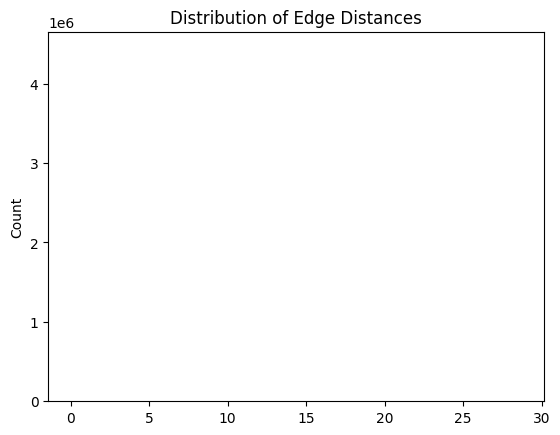

In [ ]:
import seaborn as sns
display(sns.histplot(res01['lengths']).set_title('Distribution of Shortest Path Lengths'))
display(sns.histplot(res01['distances']).set_title('Distribution of Edge Distances'))

Distriution of lengths almost looks like a semicircle distribution.

AttributeError: 'FacetGrid' object has no attribute 'set_title'

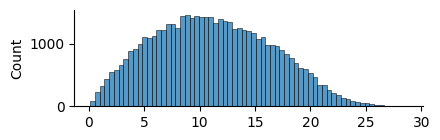

In [ ]:
sns.displot(res01['lengths'],height=1.5,aspect=3).set_title('Distribution of Shortest Path Lengths')

In [ ]:
import pandas as pd
pd.DataFrame(res01['distances']).describe().round(2)

,0
count,31976004.00
mean,0.01
std,0.00
min,0.01
25%,0.01
50%,0.01
75%,0.01
max,0.15


Very little variance on distances, ie a smooth terrain? 

AttributeError: 'FacetGrid' object has no attribute 'set_title'

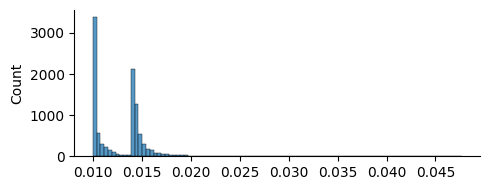

In [ ]:
sampled_distances = np.random.choice(res01['distances'], size=10000, replace=False)
sns.displot(sampled_distances, log_scale=False,aspect=2.5,height=2).set_title('Distribution of Edge Distances')

## Checking the sizs of all the datasets
They're all the same size per phase

In [ ]:
import os 

all_files = os.listdir("generated")
phase1_files = [f for f in all_files if f.endswith("phase1.npz")]#[:5]
phase2_files = [f for f in all_files if f.endswith("phase2.npz")]#[:5]

print("Phase 1 files:")
for f_name in phase1_files:
    print(f_name)
    res = np.load(f"generated/{f_name}")
    print(f"  Keys: {list(res.keys())}")
    print(f"  edge_index shape (2, num_edges): {res['edge_index'].shape}")
    print(f"  distances shape (num_edges,): {res['distances'].shape}")
    print(f"  srcs shape (num_samples,): {res['srcs'].shape}")
    print(f"  node_features shape: {res['node_features'].shape}")
    print()

print("\nPhase 2 files:")
for f_name in phase2_files:
    print(f_name)
    res = np.load(f"generated/{f_name}")
    print(f"  Keys: {list(res.keys())}")
    print(f"  edge_index shape (2, num_edges): {res['edge_index'].shape}")
    print(f"  distances shape (num_edges,): {res['distances'].shape}")
    print(f"  srcs shape (num_samples,): {res['srcs'].shape}")
    print(f"  node_features shape: {res['node_features'].shape}")
    print()

Phase 1 files:
res12_phase1.npz
  Keys: ['edge_index', 'distances', 'srcs', 'tars', 'lengths', 'node_features']
  edge_index shape (2, num_edges): (2, 221112)
  distances shape (num_edges,): (221112,)
  srcs shape (num_samples,): (50000,)
  node_features shape: (27889, 3)

res03_phase1.npz
  Keys: ['edge_index', 'distances', 'srcs', 'tars', 'lengths', 'node_features']
  edge_index shape (2, num_edges): (2, 3551112)
  distances shape (num_edges,): (3551112,)
  srcs shape (num_samples,): (50000,)
  node_features shape: (444889, 3)

res06_phase1.npz
  Keys: ['edge_index', 'distances', 'srcs', 'tars', 'lengths', 'node_features']
  edge_index shape (2, num_edges): (2, 888444)
  distances shape (num_edges,): (888444,)
  srcs shape (num_samples,): (50000,)
  node_features shape: (111556, 3)

res17_phase1.npz
  Keys: ['edge_index', 'distances', 'srcs', 'tars', 'lengths', 'node_features']
  edge_index shape (2, num_edges): (2, 109980)
  distances shape (num_edges,): (109980,)
  srcs shape (num_